# Few Simple Methods for Finding Roots

-Vikram Khaire; Date: August 30, 2021 

#### Finding roots is just solving $f(x) = 0$ 

Numerically it is to find out when $f(x)$ approximately crosses zero. The inputs you need is a finite intervel $[a, b]$ in which you can find the solution. 

-------------

### Example:  Find roots of polynomial $f(x) =  5x^2 + 2x -25$

#### Normal Algebra: 

$f(x)= 0$

$Ax^2+Bx +c = 0$

Solution is $\frac{- B \pm \sqrt{B^2 - 4 AC}}{2A} $

In [1]:
# basic imports 
#%matplotlib inline
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def solve_quadratic(a, b, c):
    square_root_term  = np.sqrt(b**2 - 4*a*c)
    first_solution  = (-b + square_root_term)/(2*a)
    second_solution = (-b - square_root_term)/(2*a)
    return first_solution, second_solution

In [3]:
solve_quadratic(5, 2, -25)

(2.0449944320643647, -2.444994432064365)

####  Let's plot above function 

In [4]:
def function(x):
    return 5*x**2+ 2*x -25

<IPython.core.display.Javascript object>


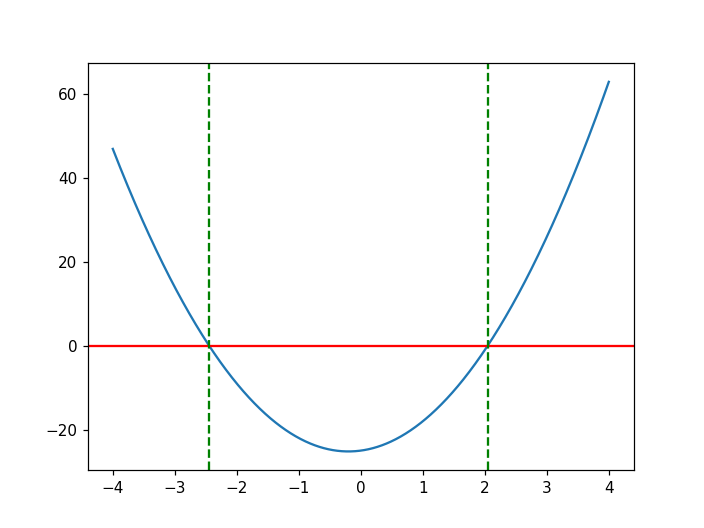

In [5]:
# simple plotting
x = np.linspace(-4, 4, 1000)
plt.plot(x, function(x))
plt.axhline(0, color = 'r')
plt.axvline(-2.4445, ls = '--', c = 'g')
plt.axvline(2.045, linestyle = '--', color = 'g')


In [6]:
function(np.array([solve_quadratic(5, 2, -25)[0], solve_quadratic(5, 2, -25)[1]]))

array([-7.10542736e-15,  0.00000000e+00])

## Bisection method

* Step 1:  Specify or guess interval $[a, b]$ in which at least one solution exists i.e such that $f(a)$ and $f(b)$ has opposite signs

<IPython.core.display.Javascript object>


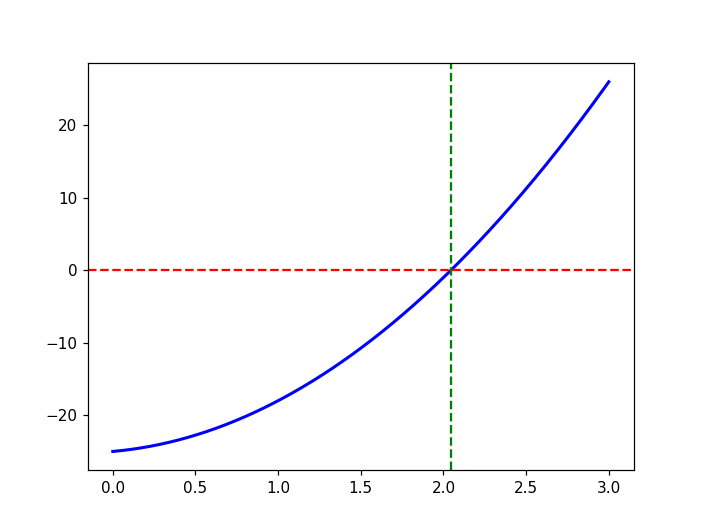

In [7]:
a=0; b=3
x = np.linspace(0, 3, 1000)
plt.figure()
plt.plot(x, function(x), lw =2., c= 'b')
plt.axhline(0, color = 'r', ls = '--')
#plt.axvline(-2.4445, ls = '--', c = 'g')
plt.axvline(2.045, linestyle = '--', color = 'g')

* Step 2: find midpoing $c = \frac{a + b}{2}$ and $f(c)$

In [8]:
c = (a+b)/2
print(c)
function(c)

1.5


-10.75

* Step 3: Depending on sign of the $f(c)$ find next interval for search

     1) First check if (we are lucky!) $f(c) = 0$.
     
     2) If not then check the sign of $f(c)$ and compare it with sign of $f(a)$ and $f(b)$ to determine
     which two have opposite signs. The solution lies somewhere in that interval. 
     
     3) Depending on result of above step replace $a$ or $b$ by the value of c and repeate the Steps 2 and 3
     till you find solution (within your specified tolerance/error i.e $\Delta = |f(a) - f(b)|$). 
                

In [9]:
def bisection_root(a, b, error = 0.001):
    
    while (abs(function(a)-function(b))) > error:
        
        c = (a+b)/2
        
        if function(c)==0:
            break
        
        if function(c)*function(a) < 0:
            b=c
        else:
            a=c
                    
    print('Solution is ', c)
        
    return c
    

In [10]:
bisection_root(0, 3)

Solution is  2.0449905395507812


2.0449905395507812

### A very simple animation of the bisection code 

Note: Animations will not be asked to reproduce in exams. These are just for fun illustration. (Also, I have just started exploring animation couple of hours ago. 😄 )

In [12]:
def bisection_array(a, b, iter_max =20):
    
    arr_c = []
    arr_a = []
    arr_b = []
    arr_iter = []
    arr_func = []
    
    
    i = 0
    while i < iter_max:
        
        c = (a+b)/2
        i = i + 1
        
        if function(c)==0:
            break
        
        if function(c)*function(a) < 0:
            b=c
        else:
            a=c
            
        arr_c.append(c)
        arr_a.append(a)
        arr_b.append(b)
        arr_iter.append(i)
        arr_func.append(function(c))

        
    return arr_c, arr_func, arr_iter, arr_a, arr_b

In [13]:
arr_c,  arr_func, arr_iter, arr_a, arr_b = bisection_array(0, 3)

<IPython.core.display.Javascript object>


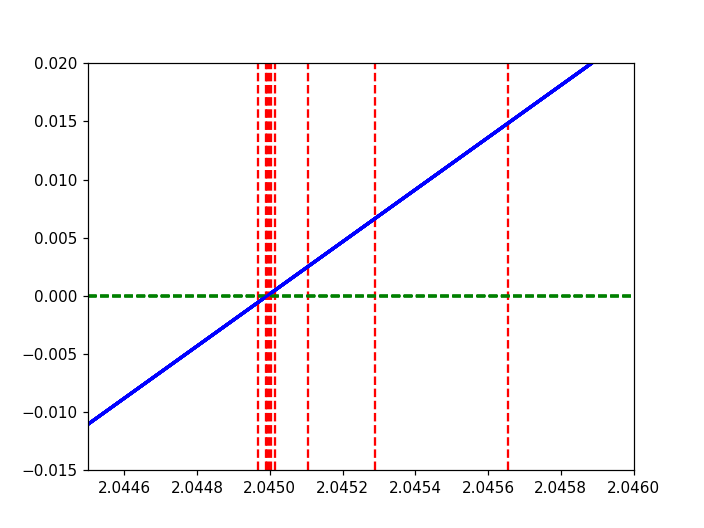

In [14]:
# import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(1.4, 2.4), ylim=(-17, 17))
x = np.linspace(0, 5, 1000)
y = function(x)
ax.axhline(0, ls ='--', c ='g')
ax.plot(x, y, c = 'b', lw =2)
line, = ax.plot([], [], lw=2)
iter_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)


# initialization function: plot the background of each frame
def init():
    iter_text.set_text('')
    return line

# animation function. This is called sequentially
def animate(i):
    plt.axvline(arr_c[i], color = 'r', ls = '--')
    iter_text.set_text('iteration = {}'.format(i +1) )

    if i >8:
        ax = plt.axes(xlim=(2.0445, 2.046), ylim=(-0.015, 0.02))
        x = np.linspace(0, 5, 1000)
        y = function(x)
        ax.axhline(0, ls ='--', c ='g')
        ax.plot(x, y, c = 'b', lw =2)
        
    return line

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func= init, frames=20, interval=800)#, blit=True)

### accuracy of bisection with each iteration 

* solution lies in interval $|c_n - c| \le \frac{|b-a|}{2^n}$. Converges lineraly to the solution.

In [15]:
import astropy.table as tab
tab.Table((arr_iter, arr_a, arr_b, arr_c, arr_func), names= ('iteration', 'a', 'b', 'c', 'f(c)'))


iteration,a,b,c,f(c)
int64,float64,float64,float64,float64
1,1.5,3.0,1.5,-10.75
2,1.5,2.25,2.25,4.8125
3,1.875,2.25,1.875,-3.671875
4,1.875,2.0625,2.0625,0.39453125
5,1.96875,2.0625,1.96875,-1.6826171875
6,2.015625,2.0625,2.015625,-0.655029296875
7,2.0390625,2.0625,2.0390625,-0.13299560546875
8,2.0390625,2.05078125,2.05078125,0.1300811767578125
9,2.044921875,2.05078125,2.044921875,-0.001628875732421875
